In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
!pip install rarfile

In [ ]:
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image
# Download the RAR file
url = 'https://drive.google.com/uc?id=1VVJ_lo2Z85MhIQ395W13opPoHQRQUKMJ'
#https://drive.google.com/file/d/1o2UTmJ_wqL3CwO1WV0prOd3p2FA7LsZH/view?usp=drive_link
output_rar = '/content/Chest_XRay_Dataset.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')


Downloading...
From (original): https://drive.google.com/uc?id=1VVJ_lo2Z85MhIQ395W13opPoHQRQUKMJ
From (redirected): https://drive.google.com/uc?id=1VVJ_lo2Z85MhIQ395W13opPoHQRQUKMJ&confirm=t&uuid=27da41ff-fd19-47fa-b459-8c8d6e110ddf
To: /content/Chest_XRay_Dataset.rar
100%|██████████| 38.0M/38.0M [00:00<00:00, 48.0MB/s]


RAR file extracted successfully!


In [ ]:
# Path to the extracted dataset folder

dataset = '/content/Chest_XRay_Dataset'

Downloading...
From (original): https://drive.google.com/uc?id=1VVJ_lo2Z85MhIQ395W13opPoHQRQUKMJ
From (redirected): https://drive.google.com/uc?id=1VVJ_lo2Z85MhIQ395W13opPoHQRQUKMJ&confirm=t&uuid=ffd475dd-dc47-4b1f-9cd1-848435fdb97c
To: /content/Chest_XRay_Dataset.rar
100%|██████████| 38.0M/38.0M [00:00<00:00, 151MB/s]


Found 4099 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 214s 901ms/step - accuracy: 0.8421 - loss: 0.3507 - val_accuracy: 0.7299 - val_loss: 1.4766
Epoch 2/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 53s 408ms/step - accuracy: 0.9185 - loss: 0.2047 - val_accuracy: 0.7299 - val_loss: 2.8828
Epoch 3/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 412ms/step - accuracy: 0.9301 - loss: 0.1802 - val_accuracy: 0.7299 - val_loss: 1.5566
Epoch 4/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 410ms/step - accuracy: 0.9503 - loss: 0.1315 - val_accuracy: 0.7726 - val_loss: 0.9021
Epoch 5/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 54s 413ms/step - accuracy: 0.9635 - loss: 0.1139 - val_accuracy: 0.9607 - val_loss: 0.1244
Epoch 6/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 411ms/step - accuracy: 0.9603 - loss: 0.1158 - val_accuracy: 0.8974 - val_loss: 0.2387
Epoch 7/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 410ms/step - accuracy: 0.9717 - loss: 0.0739 - val_accuracy: 0.9402 - val_loss: 0.1583
Epoch 8/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 54s 414ms/step - accuracy: 0.9687 - loss: 0.0793 - va

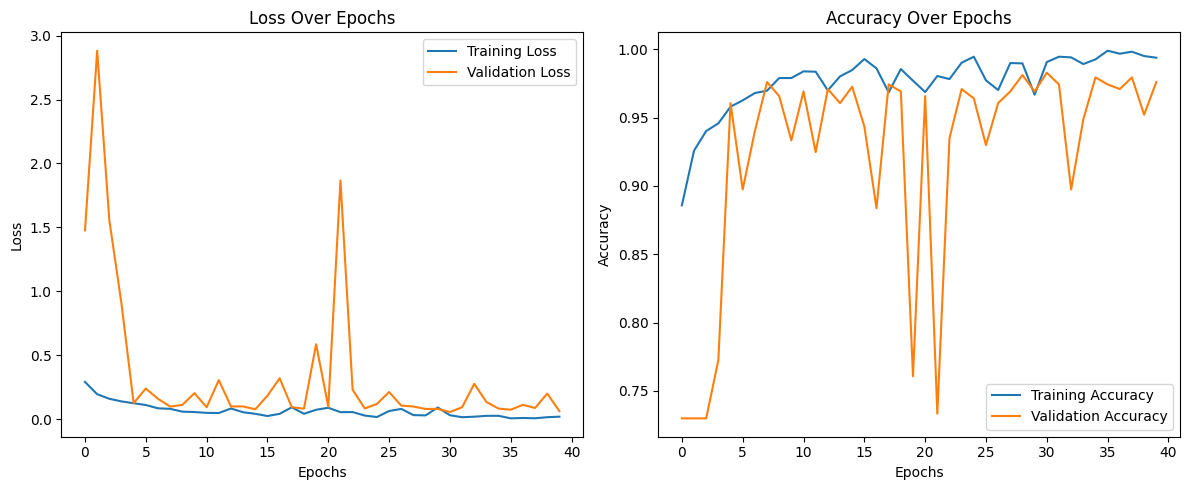

37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 473ms/step

Performance on Test Data
Precision: 0.9651411938650526
Recall: 0.9641638225255973
F1 Score: 0.9644356450251579
Accuracy: 0.9641638225255973
Confusion Matrix:
            NORMAL  PNEUMONIA
NORMAL        304         13
PNEUMONIA      29        826


In [ ]:
from tensorflow.keras import backend as K
K.clear_session()
!pip install rarfile
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image

# Download the RAR file
url = 'https://drive.google.com/uc?id=1VVJ_lo2Z85MhIQ395W13opPoHQRQUKMJ'
output_rar = '/content/Chest_XRay_Dataset.rar'
gdown.download(url, output_rar, quiet=False)

# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

# Path to the extracted dataset folder
data_dir = '/content/Chest_XRay_Dataset'

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Define the CNN architecture using InceptionV3
inception_model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))

# Create a custom model for binary classification
model = models.Sequential()
# Add the InceptionV3 base
model.add(inception_model)

# Add global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a dense layer with 1024 units and ReLU activation
model.add(layers.Dense(1024, activation='relu'))

# Add a final output layer with 2 units and softmax activation for multi-class (2-class) classification
model.add(layers.Dense(2, activation='softmax'))  # 2 output neurons for 2 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ImageDataGenerators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validate'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=40, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['NORMAL', 'PNEUMONIA'], title="Performance on Test Data")


Downloading...
From (original): https://drive.google.com/uc?id=1IrjFDlIFzVnReLVUgj6CbtlmL1uardVh
From (redirected): https://drive.google.com/uc?id=1IrjFDlIFzVnReLVUgj6CbtlmL1uardVh&confirm=t&uuid=5eb00d86-861a-49e5-860b-13916c0cda35
To: /content/RIU_Plant_Disease.rar
100%|██████████| 248M/248M [00:03<00:00, 73.8MB/s]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,906,085 (91.19 MB)

 Trainable params: 23,871,653 (91.06 MB)

 Non-trainable params: 34,432 (134.50 KB)

Found 1750 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.3612 - loss: 1.4974 - val_accuracy: 0.2000 - val_loss: 1.8367
Epoch 2/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 405ms/step - accuracy: 0.5110 - loss: 1.1485 - val_accuracy: 0.2000 - val_loss: 2.3005
Epoch 3/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 407ms/step - accuracy: 0.5965 - loss: 0.9792 - val_accuracy: 0.2040 - val_loss: 2.3488
Epoch 4/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 408ms/step - accuracy: 0.5979 - loss: 0.9844 - val_accuracy: 0.2080 - val_loss: 2.8362
Epoch 5/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 407ms/step - accuracy: 0.6373 - loss: 0.9323 - val_accuracy: 0.2880 - val_loss: 2.3313
Epoch 6/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 410ms/step - accuracy: 0.6565 - loss: 0.8652 - val_accuracy: 0.3040 - val_loss: 1.5757
Epoch 7/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 422ms/step - accuracy: 0.7063 - loss: 0.7599 - val_accuracy: 0.2720 - val_loss: 2.0597
Epoch 8/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.7346 - loss: 0.6947 - val_accuracy: 0.3200 

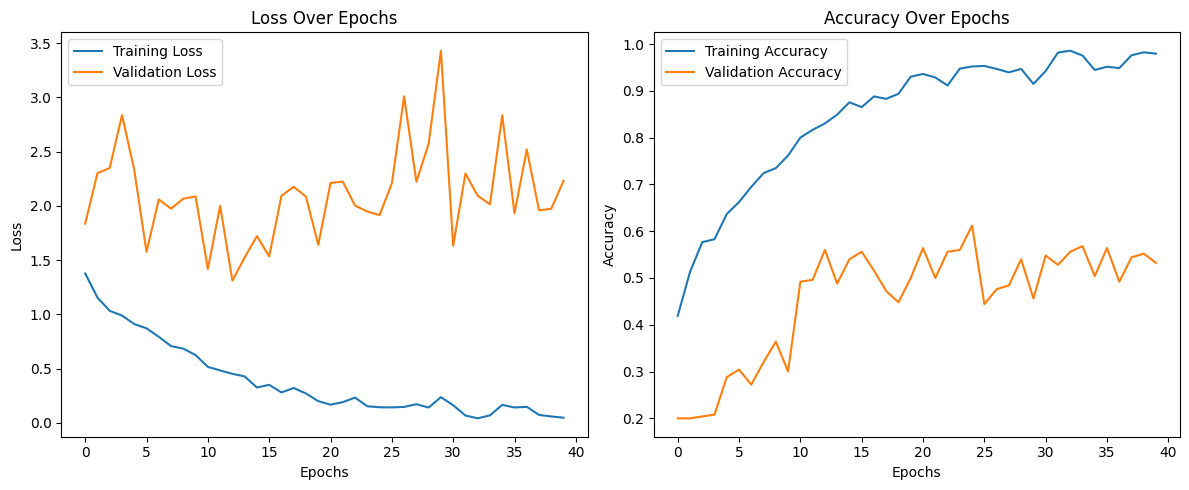

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 566ms/step

Performance on Test Data
Precision: 0.5763227577769526
Recall: 0.54
F1 Score: 0.5396177644831853
Accuracy: 0.54
Confusion Matrix:
         Class1  Class2  Class3  Class4  Class5
Class1      49      46       0       1       4
Class2       6      58      13      11      12
Class3       0      12      39      14      35
Class4       0      12      27      47      14
Class5       1       5      11       6      77


In [ ]:
from tensorflow.keras import backend as K
K.clear_session()
!pip install rarfile
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image

# Download the RAR file
url = 'https://drive.google.com/uc?id=1IrjFDlIFzVnReLVUgj6CbtlmL1uardVh'
output_rar = '/content/RIU_Plant_Disease.rar'
gdown.download(url, output_rar, quiet=False)

# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

# Path to the extracted dataset folder
dataset = '/content/RIU_Plant_Disease/CASAVA'

import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add,
    GlobalAveragePooling2D, Flatten, Dense
)
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Directory for the dataset
data_dir = dataset

# Define the CNN architecture

# Initialize the InceptionV3 model without pre-trained weights
inception_model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))

# Create a custom model for binary classification
model = models.Sequential()
# Add the InceptionV3 base
model.add(inception_model)

# Add global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a dense layer with 1024 units and Swish activation
model.add(layers.Dense(1024, activation='swish'))

# Add a final output layer with 5 units (assuming 5 classes) and softmax activation for multi-class classification
model.add(layers.Dense(5, activation='softmax'))  # Adjust the number of output neurons for your use case (e.g., 2 for binary)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validate'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=40, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Class1', 'Class2', 'Class3', 'Class4', 'Class5'], title="Performance on Test Data")
